# 1. PACKAGE IMPORTS

In [1]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Import Data

In [2]:
data = pd.read_excel('Concrete_Data.xls')
features = data.columns[0:8]
label = data.columns[8]
rows = data.shape[0]
cols = data.shape[1]
num_fts = cols - 1
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## 2. DATA PRE-PROESSING

In [3]:
# check for null values
for feature in features:
    data[feature].isnull().sum()
    # no null values!
    
# create x and y variables for raw data
x_raw = data.values[:,:8]
y_raw = data.values[:,8]
#print(x_raw)
#print(y_raw)
#print(data[0] - data[0].mean())

# standardize features
new = np.zeros((rows,cols))
for index,f in enumerate(features):
    new[:,index] = (data[f] - data[f].mean()) / data[f].std()

# standaradize target
new[:,8] = (data[label] - data[label].mean()) / data[label].std()

# create x and y varaiables for new data
x_new = new[:,:8]
y_new = new[:,8]

### a) Visualize Raw Data vs. Concrete Strength

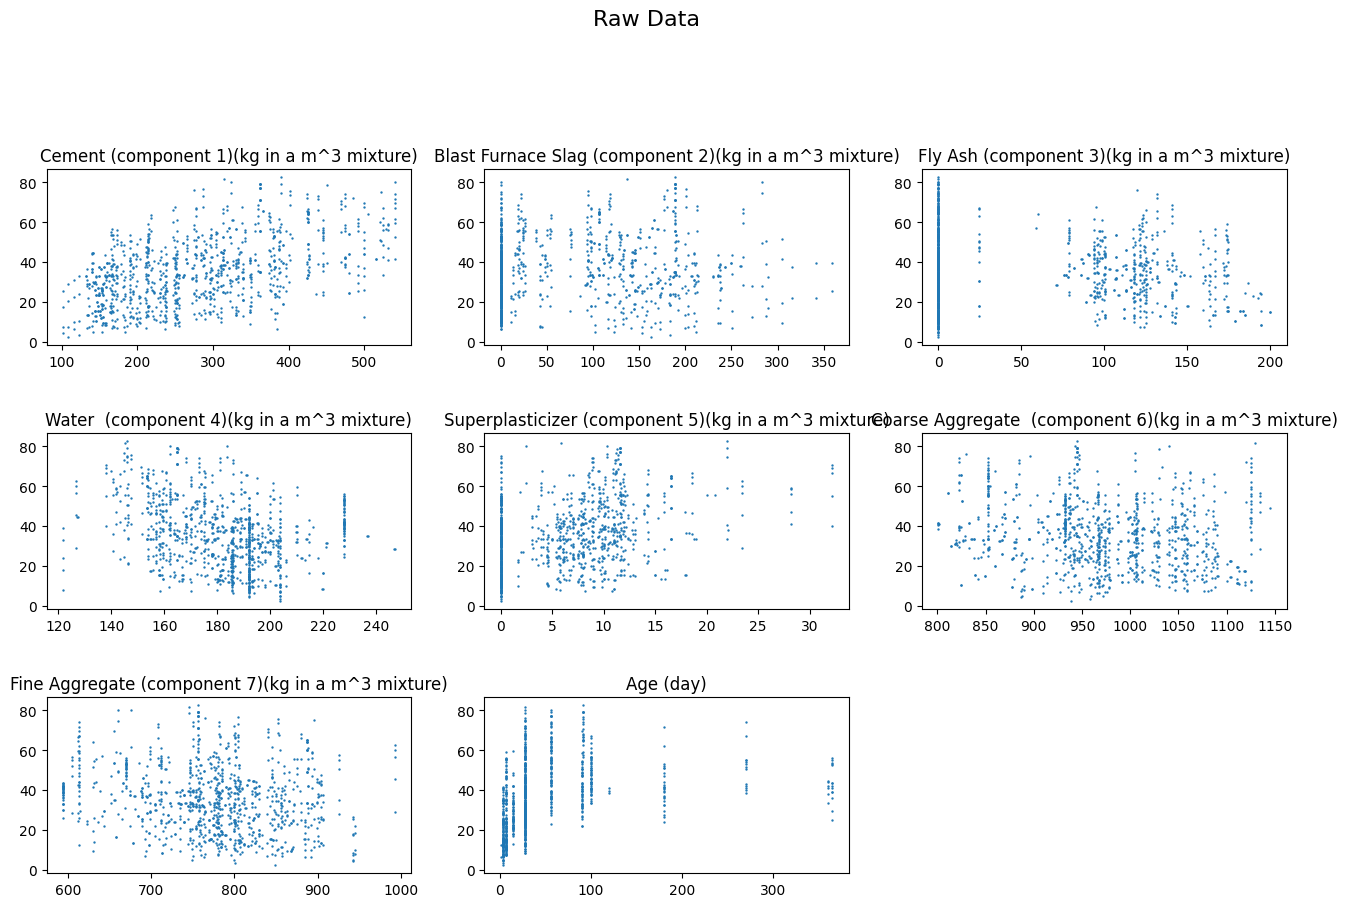

In [4]:

f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('Raw Data', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(data.values[:, index], data.values[:,8], s=0.5)
    ax.set_title(feature_name)
    
plt.show()

### b) Visualize New Data vs. Concrete Strength

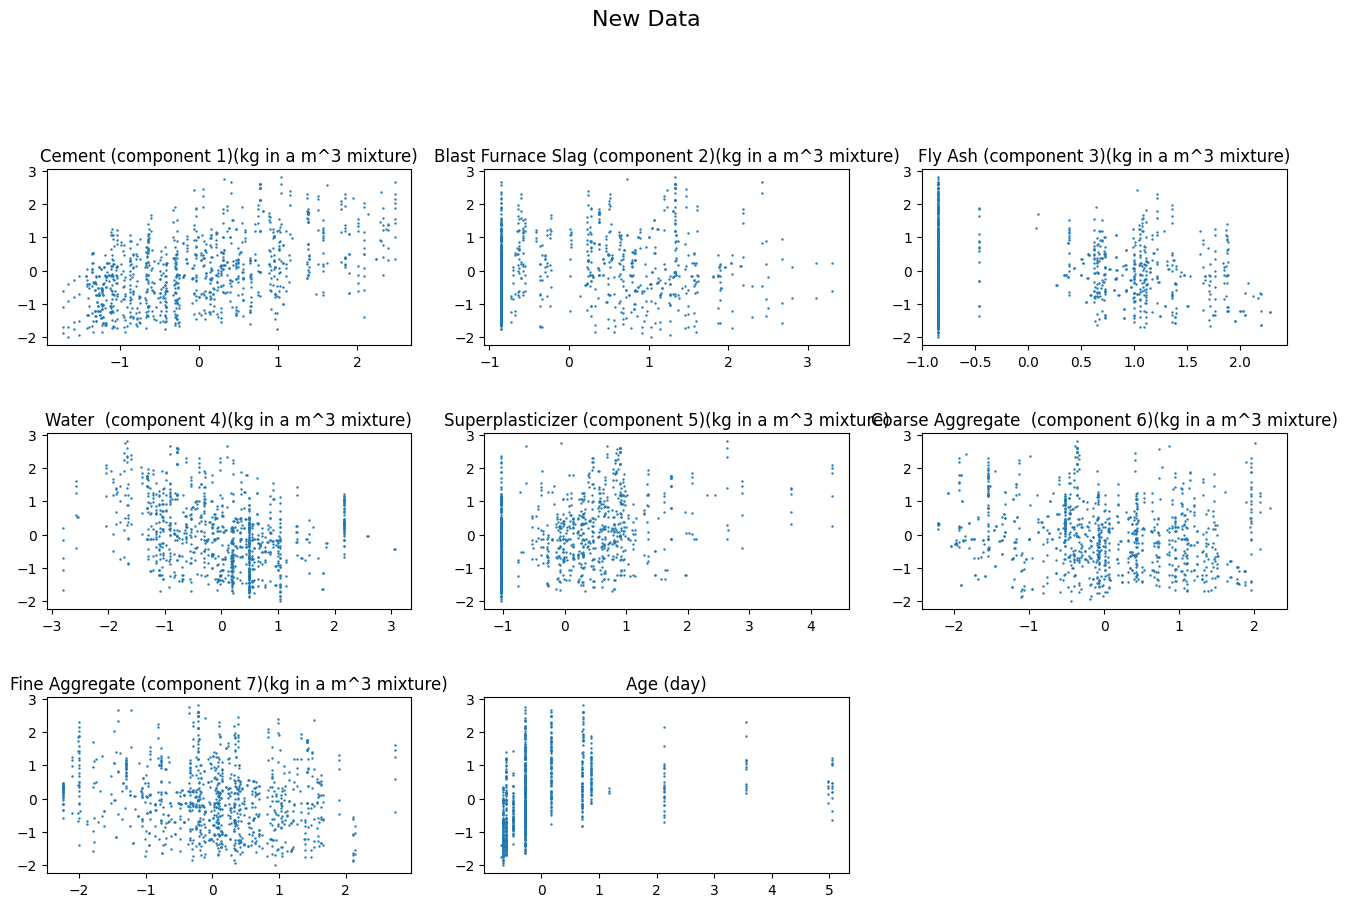

In [5]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('New Data', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    print()
    ax.scatter(x_new[:,index], y_new, s=0.5)
    ax.set_title(feature_name)
    
plt.show()

### c) Visualize Raw Data Distributions

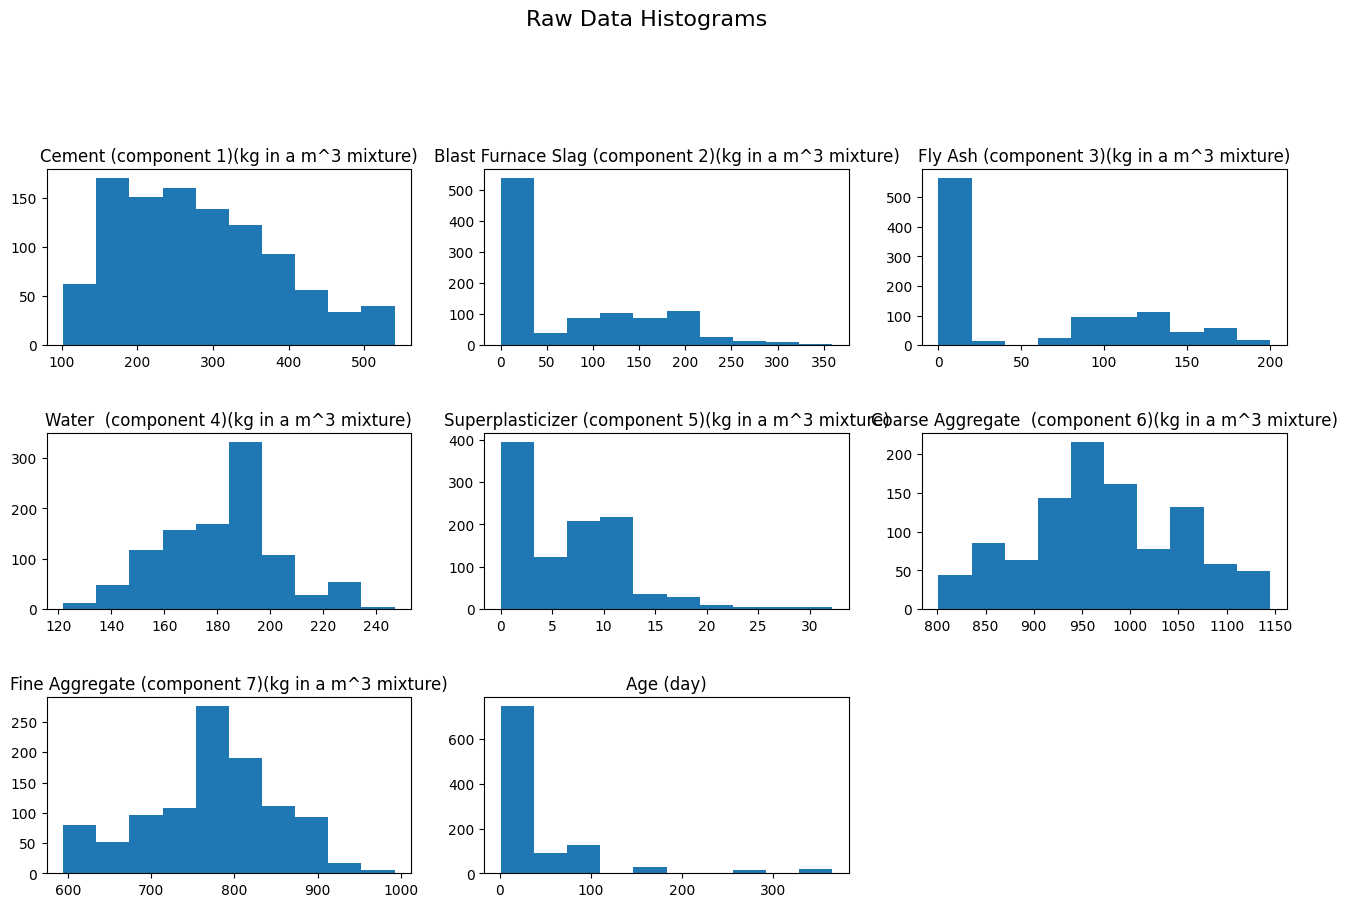

In [6]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('Raw Data Histograms', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    print()
    ax.hist(x_raw[:,index])
    ax.set_title(feature_name)
    
plt.show()

### d) Visualize New Data Distributions

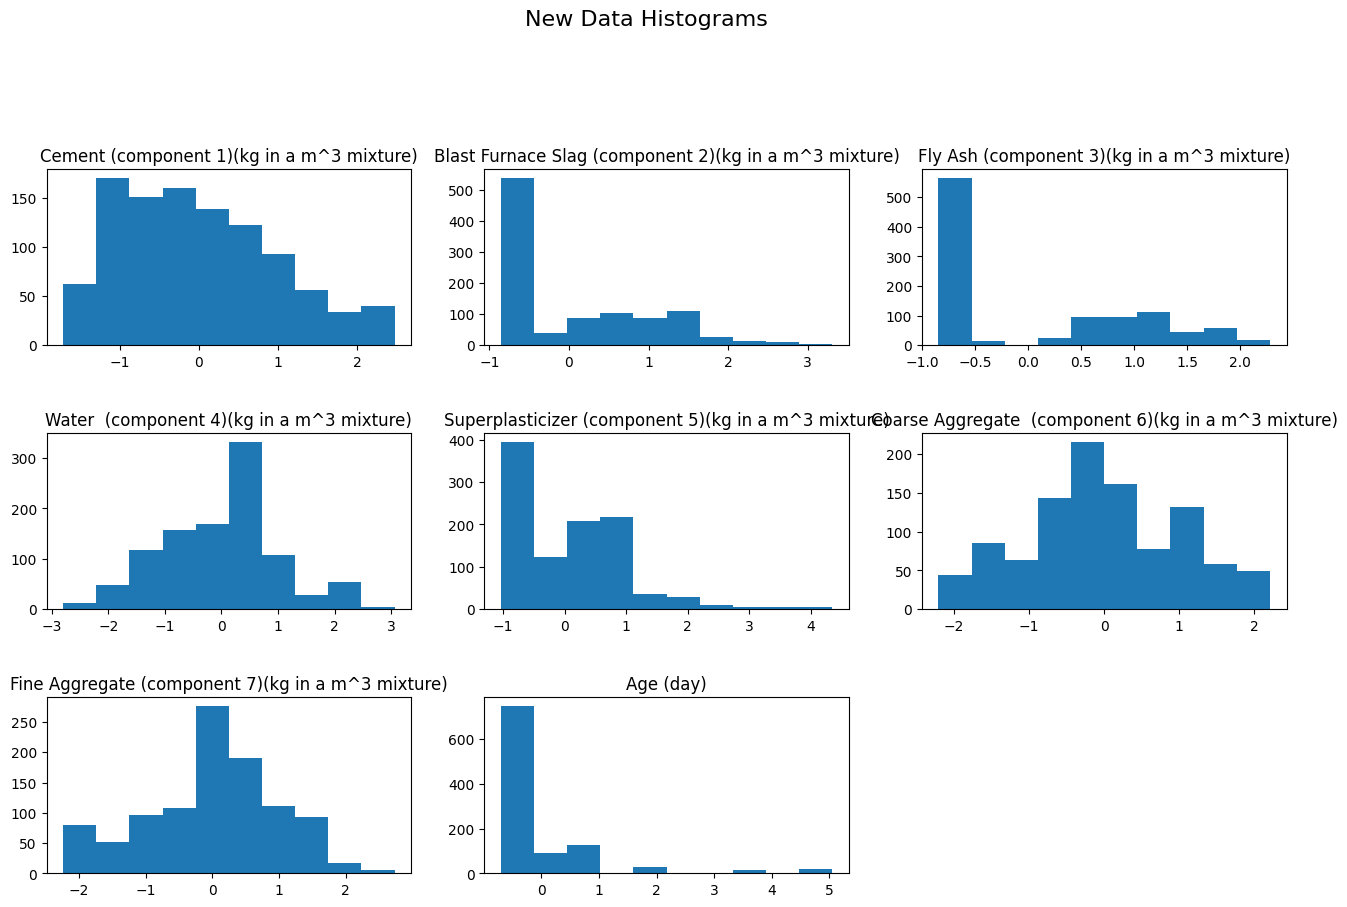

In [7]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('New Data Histograms', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    print()
    ax.hist(x_new[:,index])
    ax.set_title(feature_name)
    
plt.show()

# 3. SPLIT TRAINING & TESTING DATA

In [8]:
# split into training & testing sets
N_raw = len(y_raw)
N_new = len(y_new)
### should have 900 training samples
x_raw_train, x_raw_test, y_raw_train, y_raw_test = train_test_split(x_raw, y_raw, test_size=0.1255, random_state=10)
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.1255, random_state=10)
print(len(x_raw_train))
print(len(x_raw_test))

900
130


# 4. FUNCTIONS

In [9]:
def MSEUni(x, ft, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = m*x[i,ft] + b
        err += (y[i] - y_hat)**2
    MSE = 1/n * err
    return MSE

In [10]:
def MSEMulti(x, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = np.dot(m,x[i]) + b
        err += (y[i] - y_hat)**2
    MSE = 1/n * err
    return MSE

In [11]:
def R2(Var, MSE):
    r2 = 1- (MSE/Var)
    return r2

In [12]:
def UnivariateModel(x, y, ft, alpha):
    m = 0
    b = np.mean(y)
    sum_m = 0
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = m*x[i,ft]+b
            sum_m += (y[i] - y_star) * (-2 * x[i,ft])
            sum_b += (y[i] - y_star) * (-2)
        dLdm = 1/n * sum_m
        #print(dLdm)
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEUni(x, ft, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mse, r2

In [13]:
# best alpha: model with lowest MSE
def best_alphaUni(x, y, ft):
    alpha = np.linspace(0.000001,0.00001,5)
    best = 10000000
    best_alpha = 1000000
    for a in range(len(alpha)):
        [m, b, mse, r2] = UnivariateModel(x, y, ft, alpha[a])
        if mse < best:
            best = mse
            best_alpha = alpha[a]
    return best_alpha

In [14]:
def MultivariateModel(x, y, alpha):
    m = [0, 0, 0, 0, 0, 0, 0, 0]
    b = np.mean(y)
    sum_m = [0, 0, 0, 0, 0, 0, 0, 0]
    sum_b = 0
    n = len(x)
    dLdm = dLdb = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = np.dot(m,x[i])+b
            sum_b += (y[i] - y_star) * (-2)
            sum_m += (y[i] - y_star) * (-2 * x[i])
        dLdm = 1/n * sum_m
        #print(dLdm)
        dLdb = 1/n * sum_b
        #print('m: ', m)
        m_new = m - alpha * dLdm
        #print('m_new: ',m_new)
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEMulti(x, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mse, r2

In [15]:
# find optimal value of alpha for feature 0
# best alpha: model with lowest MSE
def best_alphaMulti(x, y):
    alpha = np.linspace(0.0000001,0.000001,5)
    best = 10000000
    best_alpha = 1000000
    for a in range(len(alpha)):
        [m, b, mse, r2] = MultivariateModel(x, y, alpha[a])
        if mse < best:
            best = mse
            best_alpha = alpha[a]
    return best_alpha

# 5. UNIVARIATE LINEAR REGRESSION

### a) Raw Data

   ### i) Find best alpha values for each feature

In [16]:
best_a_Uni_raw = []
for f in range(cols-1):
    best_a_Uni_raw.append(best_alphaUni(x_raw_train, y_raw_train, f))
print("Best alpha values for each feature:")
for i in range(len(best_a_Uni_raw)):
    print('Feature ',i+1,': ',best_a_Uni_raw[i])

/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_5144/3839313694.py:6: RuntimeWarning: overflow encountered in double_scalars
  err += (y[i] - y_hat)**2
/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_5144/3789917600.py:14: RuntimeWarning: overflow encountered in double_scalars
  sum_m += (y[i] - y_star) * (-2 * x[i,ft])
/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_5144/3789917600.py:14: RuntimeWarning: invalid value encountered in double_scalars
  sum_m += (y[i] - y_star) * (-2 * x[i,ft])


Best alpha values for each feature:
Feature  1 :  3.2500000000000002e-06
Feature  2 :  3.2500000000000002e-06
Feature  3 :  3.2500000000000002e-06
Feature  4 :  1e-05
Feature  5 :  5.5e-06
Feature  6 :  1e-06
Feature  7 :  1e-06
Feature  8 :  3.2500000000000002e-06


### ii) Find paramaters of univariate models

In [17]:
m_list_Uni_raw = []
b_list_Uni_raw = []
mse_list_Uni_raw = []
r2_list_Uni_raw = []
for f in range(cols-1):
    [m, b, mse, r2] = UnivariateModel(x_raw_train, y_raw_train, f, best_a_Uni_raw[f])
    m_list_Uni_raw.append(m)
    b_list_Uni_raw.append(b)
    mse_list_Uni_raw.append(mse)
    r2_list_Uni_raw.append(r2)
print('m parameter list: ', m_list_Uni_raw)
print('b parameter list: ', b_list_Uni_raw)
print('mse raw training data: ', mse_list_Uni_raw)
print('r2 raw training data: ', r2_list_Uni_raw)

m parameter list:  [0.08994721458214444, 0.02897458630455644, -0.03111659709727449, -0.11578502610406428, 0.8675433035241107, -0.0010924775292826085, -0.002275695239514769, 0.0779474178314285]
b parameter list:  [9.34981414424225, 32.426490762970246, 37.8799602374197, 56.39791349768973, 28.471322815806737, 36.49720113728066, 36.86837579118005, 29.68589425168626]
mse raw training data:  [212.61781485535556, 272.23559697697283, 273.8329443122119, 257.5544542724419, 242.26886934239153, 275.1522194461034, 274.83364005080784, 252.17952607852126]
r2 raw training data:  [0.2282716135995121, 0.011879892949051118, 0.006082080181650573, 0.06516731186825453, 0.12064864489427796, 0.0012935723560528745, 0.002449904260033442, 0.08467642339277437]


### iii) Run model on test data

In [18]:
mse_list_Uni_raw = []
var_list_Uni_raw = []
r2_list_Uni_raw = []
print("Univariate Raw Testing Data Performance")
for f in range(cols-1):
    print('Feature: ', f+1)
    var = np.var(y_raw_test)
    mse = MSEUni(x_raw_test, f, m_list_Uni_raw[f], b_list_Uni_raw[f], y_raw_test)
    r2 = R2(var, mse)
    mse_list_Uni_raw.append(mse)
    var_list_Uni_raw.append(var)
    r2_list_Uni_raw.append(r2)
    print('MSE: ', mse)
    print('Var: ', var)
    print('R-squared: ', r2)

Univariate Raw Testing Data Performance
Feature:  1
MSE:  209.86140161985443
Var:  300.81786226871424
R-squared:  0.30236389542456865
Feature:  2
MSE:  297.03047570527843
Var:  300.81786226871424
R-squared:  0.012590298112193254
Feature:  3
MSE:  290.07125712164947
Var:  300.81786226871424
R-squared:  0.035724624415637396
Feature:  4
MSE:  286.5145973704701
Var:  300.81786226871424
R-squared:  0.04754792415041942
Feature:  5
MSE:  273.1950644000591
Var:  300.81786226871424
R-squared:  0.0918256570947249
Feature:  6
MSE:  301.64080199947256
Var:  300.81786226871424
R-squared:  -0.002735674419570122
Feature:  7
MSE:  302.5149372115373
Var:  300.81786226871424
R-squared:  -0.00564153647667065
Feature:  8
MSE:  279.2512653022959
Var:  300.81786226871424
R-squared:  0.07169320599437456


### b) New Data

#### i) Find best alpha values for each feature

In [19]:
best_a_Uni_new = []
for f in range(cols-1):
    best_a_Uni_new.append(best_alphaUni(x_new_train, y_new_train, f))
print("Best alpha values for each feature:")
for i in range(len(best_a_Uni_new)):
    print('Feature ',i+1,': ',best_a_Uni_new[i])

Best alpha values for each feature:
Feature  1 :  7.75e-06
Feature  2 :  7.75e-06
Feature  3 :  7.75e-06
Feature  4 :  7.75e-06
Feature  5 :  7.75e-06
Feature  6 :  7.75e-06
Feature  7 :  7.75e-06
Feature  8 :  7.75e-06


#### ii) Find paramaters of univariate models

In [20]:
m_list_Uni_new = []
b_list_Uni_new = []
mse_list_Uni_new = []
r2_list_Uni_new = []
for f in range(cols-1):
    [m, b, mse, r2] = UnivariateModel(x_new_train, y_new_train, f, best_a_Uni_new[f])
    m_list_Uni_new.append(m)
    b_list_Uni_new.append(b)
    mse_list_Uni_new.append(mse)
    r2_list_Uni_new.append(r2)
print('m parameter list: ', m_list_Uni_new)
print('b parameter list: ', b_list_Uni_new)
print('MSE new training data: ', mse_list_Uni_new)
print('R-squared new trainig data: ', r2_list_Uni_new)

m parameter list:  [0.49654345126992167, 0.12973625029836447, -0.09364319871772217, -0.30070939043391315, 0.3835342098172598, -0.1510635775931988, -0.1786438216857734, 0.3625925435581992]
b parameter list:  [-0.02497084801663496, -0.004456753968107466, -0.009809801410772626, -0.009589260663738376, -0.000244998654951565, -0.004593449082995294, -0.004954657930579244, -0.001032612132006443]
MSE new training data:  [0.7517272708339123, 0.9706718281372035, 0.9794277298857037, 0.9017393095010126, 0.8539292045483187, 0.9639686631961866, 0.9576799267975291, 0.8840508756819322]
R-squared new trainig data:  [0.23852893761761162, 0.016746449312203038, 0.007877054698981256, 0.08657246232935134, 0.13500227567183543, 0.02353649980923811, 0.029906749994809023, 0.10449017133723915]


#### iii) Run model on test data

In [21]:
mse_list_Uni_new = []
var_list_Uni_new = []
r2_list_Uni_new = []
print("Univariate Normalized Testing Data Performance")
for f in range(cols-1):
    print('Feature: ', f+1)
    var = np.var(y_new_test)
    mse = MSEUni(x_new_test, f, m_list_Uni_new[f], b_list_Uni_new[f], y_new_test)
    r2 = R2(var, mse)
    mse_list_Uni_new.append(mse)
    var_list_Uni_new.append(var)
    r2_list_Uni_new.append(r2)
    print('MSE: ', mse)
    print('Var: ', var)
    print('R-squared: ', r2)

Univariate Normalized Testing Data Performance
Feature:  1
MSE:  0.7543439360963465
Var:  1.0778922446698727
R-squared:  0.3001675818463836
Feature:  2
MSE:  1.0518282417964362
Var:  1.0778922446698727
R-squared:  0.024180527322950618
Feature:  3
MSE:  1.0481305470248585
Var:  1.0778922446698727
R-squared:  0.0276110138023391
Feature:  4
MSE:  1.0103665805841093
Var:  1.0778922446698727
R-squared:  0.0626460246093008
Feature:  5
MSE:  0.9450667178450575
Var:  1.0778922446698727
R-squared:  0.12322709202300253
Feature:  6
MSE:  1.028136206775486
Var:  1.0778922446698727
R-squared:  0.04616049344489481
Feature:  7
MSE:  1.0651042286075507
Var:  1.0778922446698727
R-squared:  0.011863909519303162
Feature:  8
MSE:  0.947910063318805
Var:  1.0778922446698727
R-squared:  0.12058921658804345


## 6. MULTIVARIATE LINEAR REGRESSION

### a) Raw Data

#### i) Find best alpha value for the model

In [22]:
best_a_Multi_raw = best_alphaMulti(x_raw_train, y_raw_train)
print('Best alpha value: ', best_a_Multi_raw)

Best alpha value:  3.2499999999999996e-07


#### ii) Find parameters of Multivariate Model

In [23]:
[m_Multi_raw, b_Multi_raw, mse_Multi_raw, r2_Multi_raw] = MultivariateModel(x_raw_train, y_raw_train, best_a_Multi_raw)
print('m: ',m_Multi_raw)
print('b: ',b_Multi_raw)
print('MSE raw training data Multivariate: ', mse_Multi_raw)
print('R-squared raw trainig data Multivariate: ', r2_Multi_raw)

m:  [ 0.08391117  0.12137311  0.15079685 -0.287155    0.05823802 -0.02434538
  0.036685    0.13998115]
b:  35.68565586734153
MSE raw training data Multivariate:  164.57607719149743
R-squared raw trainig data Multivariate:  0.4026463371494984


#### iii) Run model on raw testing data

In [24]:
var = np.var(y_raw_test)
mse = MSEMulti(x_raw_test, m_Multi_raw, b_Multi_raw, y_raw_test)
r2 = R2(var, mse)
print("Multivariate Raw Testing Data Performance")
print('MSE: ', mse)
print('Var: ', var)
print('R-squared: ', r2)

Multivariate Raw Testing Data Performance
MSE:  176.51784834279763
Var:  300.81786226871424
R-squared:  0.4132068919992591


### b) New Data

#### i) Find best alpha value for the model

In [25]:
best_a_Multi_new = best_alphaMulti(x_new_train, y_new_train)
print('Best alpha value: ', best_a_Multi_new)

Best alpha value:  3.2499999999999996e-07


#### ii) Find parameters of Multivariate Model

In [26]:
[m_Multi_new, b_Multi_new, mse_Multi_raw, r2_Multi_raw] = MultivariateModel(x_new_train, y_new_train, best_a_Multi_new)
print('m: ',m_Multi_new)
print('b: ',b_Multi_new)
print('MSE new training data Multivariate: ', mse_Multi_raw)
print('R-squared new training data Multivariate: ', r2_Multi_raw)

m:  [ 0.47498924  0.14388505 -0.07293904 -0.29754894  0.34732004 -0.13562854
 -0.18511962  0.36008308]
b:  -0.007424597049556642
MSE new training data Multivariate:  0.44951035058095967
R-squared new training data Multivariate:  0.5446631544588609


#### iii) Run model on new testing data

In [27]:
var = np.var(y_new_test)
mse = MSEMulti(x_new_test, m_Multi_new, b_Multi_new, y_new_test)
r2 = R2(var, mse)
print("Multivariate Normalized Testing Data Performance")
print('MSE: ', mse)
print('Var: ', var)
print('R-squared: ', r2)

Multivariate Normalized Testing Data Performance
MSE:  0.42151813626604545
Var:  1.0778922446698727
R-squared:  0.6089422311456147


## 7. MEAN ABSOLUTE ERROR

In [28]:
def MAEUni(x, ft, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = m*x[i,ft] + b
        err += abs(y[i] - y_hat)
    MAE = 1/n * err
    return MAE

In [29]:
def MAEMulti(x, m, b, y):
    err = 0
    n = len(x)
    for i in range(n):
        y_hat = np.dot(m,x[i]) + b
        err += abs(y[i] - y_hat)
    MAE = 1/n * err
    return MAE

In [30]:
def UniMAE(x, y, ft, alpha):
    m = 0
    b = np.mean(y)
    sum_m = 0
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = m*x[i,ft]+b
            if m*x[i,ft] > y[i]:
                sum_m += x[i,ft]
                sum_b += 1
            elif m*x[i,ft] < y[i]:
                sum_m += -x[i,ft]
                sum_b += -1
            else:
                sum_m = sum_m
                sum_b = sum_b
            #sum_m += -x[i,ft]*(y[i]-y_star)/abs(y[i]-y_star)
            #sum_b += (y[i]-y_star)/abs(y[i]-y_star)
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        mse = MSEUni(x, ft, m, b, y)
        var = np.var(y)
        mae = MAEUni(x, ft, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mae, r2

In [31]:
def MultiMAE(x, y, alpha):
    m = [0, 0, 0, 0, 0, 0, 0, 0]
    b = np.mean(y)
    sum_m = [0, 0, 0, 0, 0, 0, 0, 0]
    sum_b = 0
    n = len(x)
    dLdm = dLdb = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = np.dot(m,x[i])+b
            if np.dot(m,x[i]) > y[i]:
                sum_m += x[i]
                sum_b += 1
            elif np.dot(m,x[i]) < y[i]:
                sum_m += -x[i]
                sum_b += -1
            else:
                sum_m = sum_m
                sum_b = sum_b
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEMulti(x, m, b, y)
        mae = MAEMulti(x, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mae, r2

In [32]:
# best alpha: model with lowest MSE
def best_alphaUniMAE(x, y, ft):
    alpha = np.linspace(0.00000001,0.000001,5)
    best = 10000000
    best_alpha = 1000000
    for a in range(len(alpha)):
        [m, b, mae, r2] = UniMAE(x, y, ft, alpha[a])
        if mae < best:
            best = mae
            best_alpha = alpha[a]
    return best_alpha

In [33]:
# best alpha: model with lowest MSE
def best_alphaMultiMAE(x, y):
    alpha = np.linspace(0.0000001,0.000001,5)
    best = 10000000
    best_alpha = 1000000
    for a in range(len(alpha)):
        [m, b, mae, r2] = MultiMAE(x, y, alpha[a])
        if mae < best:
            best = mae
            best_alpha = alpha[a]
    return best_alpha

## 8. UNIVARIATE MAE

### a) New Data

#### i) Find best alpha value for each model

In [34]:
best_a_Uni_new_MAE = []
for f in range(cols-1):
    best_a_Uni_new_MAE.append(best_alphaUniMAE(x_new_train, y_new_train, f))
print("Best alpha values for each feature:")
for i in range(len(best_a_Uni_new_MAE)):
    print('Feature ',i+1,': ',best_a_Uni_new_MAE[i])

Best alpha values for each feature:
Feature  1 :  7.525000000000001e-07
Feature  2 :  7.525000000000001e-07
Feature  3 :  5.05e-07
Feature  4 :  7.525000000000001e-07
Feature  5 :  1e-06
Feature  6 :  1e-06
Feature  7 :  5.05e-07
Feature  8 :  5.05e-07


#### ii) Find paramaters of univariate models

In [35]:
m_list_Uni_new_MAE = []
b_list_Uni_new_MAE = []
r2_list_Uni_new_MAE = []
for f in range(cols-1):
    [m, b, mae, r2] = UniMAE(x_new_train, y_new_train, f, best_a_Uni_new_MAE[f])
    m_list_Uni_new_MAE.append(m)
    b_list_Uni_new_MAE.append(b)
    r2_list_Uni_new_MAE.append(r2)
print('m parameter list: ', m_list_Uni_new_MAE)
print('b parameter list: ', b_list_Uni_new_MAE)
print('R-squared: ', r2_list_Uni_new_MAE)

m parameter list:  [0.49019265890385644, 0.09742104504193723, -0.07478401245741699, -0.23337301082921946, 0.40921289861311433, -0.16089682550905796, -0.17038956601170624, 0.28606480693429376]
b parameter list:  [-0.08659349018701173, -0.08362148976478949, -0.05702356471478959, -0.0871172736647894, -0.12107225855923393, -0.1134387830036783, -0.059645950037011695, -0.06904549147034506]
R-squared:  [0.2318283601664961, 0.00999559347364054, 0.005177670651682065, 0.076605728416963, 0.12095605851633662, 0.012321039468504935, 0.027289714987121627, 0.10170940818927299]


#### iii) Run model on test data

In [36]:
mse_list_Uni_new_MAE = []
var_list_Uni_new_MAE = []
r2_list_Uni_new_MAE = []
mae_list_Uni_new_MAE = []
print("Univariate Normalized Testing Data Performance")
for f in range(cols-1):
    print('Feature: ', f+1)
    var = np.var(y_new_test)
    mse = MSEUni(x_new_test, f, m_list_Uni_new_MAE[f], b_list_Uni_new_MAE[f], y_new_test)
    mae = MAEUni(x_new_test, f, m_list_Uni_new_MAE[f], b_list_Uni_new_MAE[f], y_new_test)
    r2 = R2(var, mse)
    mse_list_Uni_new_MAE.append(mse)
    var_list_Uni_new_MAE.append(var)
    r2_list_Uni_new_MAE.append(r2)
    print('MSE: ', mse)
    print('Var: ', var)
    print('R-squared: ', r2)
    print('MAE: ', mae)

Univariate Normalized Testing Data Performance
Feature:  1
MSE:  0.7634680572329254
Var:  1.0778922446698727
R-squared:  0.29170280145511784
MAE:  0.6961394954044943
Feature:  2
MSE:  1.0718035665002343
Var:  1.0778922446698727
R-squared:  0.0056486890964718706
MAE:  0.8101461445832144
Feature:  3
MSE:  1.0611133534157136
Var:  1.0778922446698727
R-squared:  0.015566390181513956
MAE:  0.8085719527071602
Feature:  4
MSE:  1.0257137858914496
Var:  1.0778922446698727
R-squared:  0.04840786176581491
MAE:  0.7871714867148217
Feature:  5
MSE:  0.9775135527434701
Var:  1.0778922446698727
R-squared:  0.09312497832948574
MAE:  0.7602145324597386
Feature:  6
MSE:  1.051881218836479
Var:  1.0778922446698727
R-squared:  0.024131378588181707
MAE:  0.7839200969264496
Feature:  7
MSE:  1.0742613974068993
Var:  1.0778922446698727
R-squared:  0.0033684696043855267
MAE:  0.8077560545111423
Feature:  8
MSE:  0.9721782784004648
Var:  1.0778922446698727
R-squared:  0.09807470718168587
MAE:  0.7527916275215

## 9. MULTIVARIATE MAE

### a) New Data

#### i) Use optimized alpha values from MSE model

In [37]:
best_a_Multi_new_MAE = best_alphaMultiMAE(x_new_train, y_new_train)
print('Best alpha value: ', best_a_Multi_new_MAE)

Best alpha value:  7.75e-07


#### ii) Find parameters of Multivariate Model

In [38]:
[m_Multi_new_MAE, b_Multi_new_MAE, mae, r2] = MultiMAE(x_new_train, y_new_train, best_a_Multi_new_MAE)
print('m: ',m_Multi_new_MAE)
print('b: ',b_Multi_new_MAE)
print('R-squared training data: ', r2)

m:  [ 0.48749531  0.12290211 -0.06250792 -0.29614272  0.34825196 -0.10923335
 -0.21606801  0.4329954 ]
b:  -0.09962448467034508
R-squared training data:  0.5346353888629785


#### iii) Run model on new testing data

In [39]:
var = np.var(y_new_test)
mse = MSEMulti(x_new_test, m_Multi_new_MAE, b_Multi_new_MAE, y_new_test)
mae = MAEMulti(x_new_test, m_Multi_new_MAE, b_Multi_new_MAE, y_new_test)
r2 = R2(var, mse)
print("Multivariate Normalized Testing Data Performance")
print('MAE: ', mae)
print('MSE: ', mse)
print('Var: ', var)
print('R-squared: ', r2)

Multivariate Normalized Testing Data Performance
MAE:  0.5274648177312039
MSE:  0.4414642144780225
Var:  1.0778922446698727
R-squared:  0.5904375259576803


## 10. RIDGE REGRESSION

In [40]:
def UniRidge(x, y, ft, alpha, ld):
    m = 0
    b = np.mean(y)
    sum_m = 0
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = m*x[i,ft]+b
            sum_m += -2*x[i,ft]*(y[i]-y_star) + ld 
            sum_b += -2*(y[i]-y_star)
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEUni(x, ft, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mse, r2

In [41]:
def best_ld_Uni(x, y, ft, alpha):
    ld = alpha/100
    lds = np.linspace(ld, alpha, 5)
    best = 1000000
    best_ld = 1000000
    for l in range(len(lds)):
        [m, b, mse, r2] = UniRidge(x, y, ft, alpha, ld)
        if mse < best:
            best = mse
            best_ld = lds[l]
    return best_ld

In [42]:
def MultiRidge(x, y, alpha, ld):
    m = [0, 0, 0, 0, 0, 0, 0, 0]
    b = np.mean(y)
    sum_m = [0, 0, 0, 0, 0, 0, 0, 0]
    sum_b = 0
    n = len(x)
    dLdb = 1000
    dLdm = 1000
    cnt = 0
    while cnt < 2000:
        cnt += 1
        for i in range(n):
            y_star = np.dot(m,x[i])+b
            sum_m += -2*x[i]*(y[i]-y_star) + ld
            sum_b += -2 * (y[i]-y_star)
        dLdm = 1/n * sum_m
        dLdb = 1/n * sum_b
        m_new = m - alpha * dLdm
        b_new = b - alpha * dLdb
        m = m_new
        b = b_new
        var = np.var(y)
        mse = MSEMulti(x, m, b, y)
        r2 = R2(var, mse)
    #print('Variance: ', var)
    #print('MSE: ', mse)
    #print('R-squared: ', r2)
    return m, b, mse, r2

In [43]:
def best_ld_Multi(x, y, alpha):
    ld = alpha/1000
    lds = np.linspace(ld, alpha, 5)
    best = 1000000
    best_ld = 1000000
    for l in range(len(lds)):
        [m, b, mse, r2] = MultiRidge(x, y, alpha, ld)
        if mse < best:
            best = mse
            best_ld = lds[l]
    return best_ld

## 11. UNIVARIATE RIDGE REGRESSION

### a) New Data

#### i) Find best lambda value for each model using alphas from MSE models

In [44]:
best_ld_Uni_new_Ridge = []
for f in range(cols-1):
    best_ld_Uni_new_Ridge.append(best_ld_Uni(x_new_train, y_new_train, f, best_a_Uni_new[f]))
print("Best lambda values for each feature:")
for i in range(len(best_ld_Uni_new_Ridge)):
    print('Feature ',i+1,': ',best_ld_Uni_new_Ridge[i])

Best lambda values for each feature:
Feature  1 :  7.75e-08
Feature  2 :  7.75e-08
Feature  3 :  7.75e-08
Feature  4 :  7.75e-08
Feature  5 :  7.75e-08
Feature  6 :  7.75e-08
Feature  7 :  7.75e-08
Feature  8 :  7.75e-08


#### ii) Find paramaters of univariate models

In [45]:
m_list_Uni_new_Ridge = []
b_list_Uni_new_Ridge = []
r2_list_Uni_new_Ridge = []
mse_list_Uni_new_Ridge = []
for f in range(cols-1):
    [m, b, mse, r2] = UniRidge(x_new_train, y_new_train, f, best_a_Uni_new_MAE[f], best_ld_Uni_new_Ridge[f])
    m_list_Uni_new_Ridge.append(m)
    b_list_Uni_new_Ridge.append(b)
    mse_list_Uni_new_Ridge.append(mse)
    r2_list_Uni_new_Ridge.append(r2)
print('m parameter list: ', m_list_Uni_new_Ridge)
print('b parameter list: ', b_list_Uni_new_Ridge)
print('MSE new data Univariate: ', mse_list_Uni_new_Ridge)
print('R-squared: ', r2_list_Uni_new_Ridge)

m parameter list:  [0.8614876960673374, 0.22811375651668034, -0.12625319349786834, -0.518480341866784, 0.7121241855320323, -0.29833677949187637, -0.2453785562600205, 0.46398423113488035]
b parameter list:  [-0.0014033923792965953, -0.008398695803553385, -0.006966557379578512, -0.006650886000439194, -0.011155373682518779, -0.008845440559938912, -0.007834883074274109, -0.008570909477676577]
MSE new data Univariate:  [0.8920959889253286, 0.9804623965446285, 0.9808677649730267, 0.952944371816397, 0.9754110265422236, 0.9848267781878447, 0.9630913922950568, 0.9035109001125492]
R-squared:  [0.09634077837768906, 0.006828976824795441, 0.0064183540633167, 0.03470368662643164, 0.011945822031103837, 0.0024080246318340937, 0.024425141782196458, 0.08477790858969925]


#### iii) Run model on test data

In [46]:
mse_list_Uni_new_Ridge = []
var_list_Uni_new_Ridge = []
r2_list_Uni_new_Ridge = []
print("Univariate Normalized Testing Data Performance")
for f in range(cols-1):
    print('Feature: ', f+1)
    var = np.var(y_new_test)
    mse = MSEUni(x_new_test, f, m_list_Uni_new_Ridge[f], b_list_Uni_new_MAE[f], y_new_test)
    r2 = R2(var, mse)
    mse_list_Uni_new_Ridge.append(mse)
    var_list_Uni_new_Ridge.append(var)
    r2_list_Uni_new_Ridge.append(r2)
    print('MSE: ', mse)
    print('Var: ', var)
    print('R-squared: ', r2)
    print('MAE: ', mae)

Univariate Normalized Testing Data Performance
Feature:  1
MSE:  0.8280055974558115
Var:  1.0778922446698727
R-squared:  0.23182896847967793
MAE:  0.5274648177312039
Feature:  2
MSE:  1.0696179223184192
Var:  1.0778922446698727
R-squared:  0.0076763910236571364
MAE:  0.5274648177312039
Feature:  3
MSE:  1.0474535231050681
Var:  1.0778922446698727
R-squared:  0.02823911361763909
MAE:  0.5274648177312039
Feature:  4
MSE:  1.0834286393613177
Var:  1.0778922446698727
R-squared:  -0.005136315544362002
MAE:  0.5274648177312039
Feature:  5
MSE:  1.083459871610958
Var:  1.0778922446698727
R-squared:  -0.005165290842954917
MAE:  0.5274648177312039
Feature:  6
MSE:  1.0497550015815222
Var:  1.0778922446698727
R-squared:  0.026103947985049336
MAE:  0.5274648177312039
Feature:  7
MSE:  1.084888349273937
Var:  1.0778922446698727
R-squared:  -0.00649054173889807
MAE:  0.5274648177312039
Feature:  8
MSE:  0.9628324907027319
Var:  1.0778922446698727
R-squared:  0.10674513573699584
MAE:  0.527464817731

## 12. MULTIVARIATE RIDGE REGRESSION

### a) New Data

#### i) Use optimized alpha value from MSE model

In [47]:
print('Best alpha value: ', best_a_Multi_new)
best_ld_Multi_new_Ridge = best_ld_Multi(x_new_train, y_new_train, best_a_Multi_new)
print('Best lambda value: ', best_ld_Multi_new_Ridge)


Best alpha value:  3.2499999999999996e-07
Best lambda value:  3.2499999999999996e-10


#### ii) Find parameters of Multivariate Model

In [48]:
[m_Multi_new_Ridge, b_Multi_new_Ridge, mse, r2] = MultiRidge(x_new_train, y_new_train, best_a_Multi_new, best_ld_Multi_new_Ridge)
print('m: ',m_Multi_new_Ridge)
print('b: ',b_Multi_new_Ridge)
print('R-squared training data: ', r2)

m:  [ 0.47498924  0.14388505 -0.07293904 -0.29754894  0.34732004 -0.13562854
 -0.18511962  0.36008308]
b:  -0.007424597049177573
R-squared training data:  0.5446631544559135


#### iii) Run model on new testing data

In [49]:
var = np.var(y_new_test)
mse = MSEMulti(x_new_test, m_Multi_new_Ridge, b_Multi_new_Ridge, y_new_test)
mae = MAEMulti(x_new_test, m_Multi_new_Ridge, b_Multi_new_Ridge, y_new_test)
r2 = R2(var, mse)
print("Multivariate Normalized Testing Data Performance")
print('MSE: ', mse)
print('Var: ', var)
print('R-squared: ', r2)

Multivariate Normalized Testing Data Performance
MSE:  0.42151813629743706
Var:  1.0778922446698727
R-squared:  0.6089422311164917


## Accuracy

### R-squared for RAW data models - training data

In [50]:
## 1) MSE for 8 univariate, 1 multivariate

In [51]:
## 2) Var for 8 univariate, 1 multivariate

In [52]:
## 3) R-squared = 1 - (MSE / Var(obs))

### R-squared for RAW data models - testing data

In [53]:
## 1) MSE for 8 univariate, 1 multivariate

In [54]:
## 2) Var for 8 univariate, 1 multivariate

In [55]:
## 3) R-squared = 1 - (MSE / Var(obs))

### R-squared for NEW data models - training data

In [56]:
## 1) MSE for 8 univariate, 1 multivariate

In [57]:
## 2) Var for 8 univariate, 1 multivariate

In [58]:
## 3) R-squared = 1 - (MSE / Var(obs))

### R-squared for NEW data models - testing data

In [59]:
## 1) MSE for 8 univariate, 1 multivariate

In [60]:
## 2) Var for 8 univariate, 1 multivariate

In [61]:
## 3) R-squared = 1 - (MSE / Var(obs))

## 13. VISUALIZE RESULTS

### a) MSE Univariate Data Raw

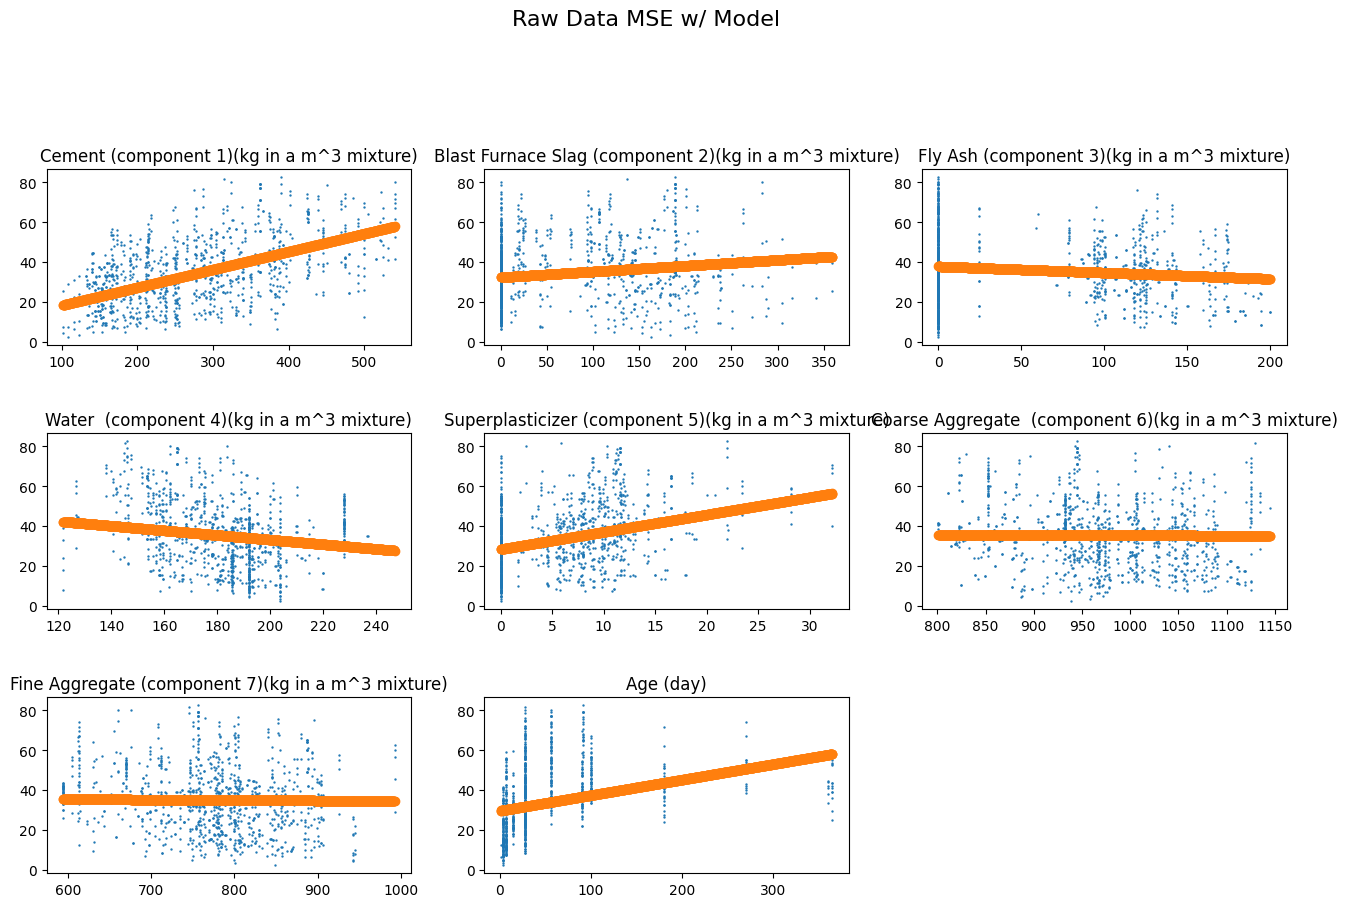

In [62]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('Raw Data MSE w/ Model', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(x_raw[:,index], y_raw, s=0.5)
    x = np.linspace(np.min(x_raw[:,index]), np.max(x_raw[:,index]),1000)
    ax.scatter(x, m_list_Uni_raw[index]*x + b_list_Uni_raw[index])
    ax.set_title(feature_name)
    
plt.show()

### b) MSE Univariate Data New

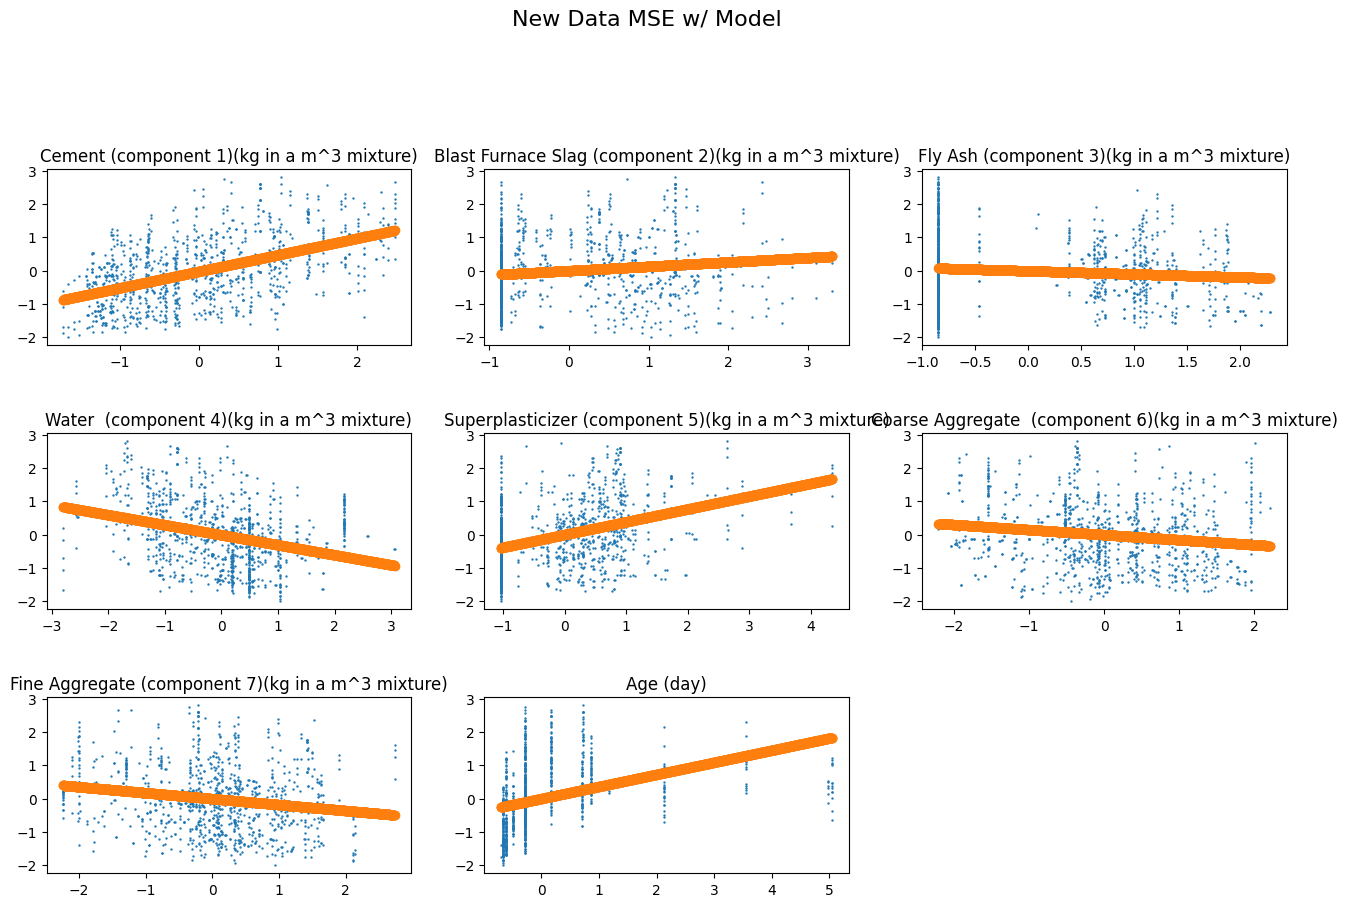

In [63]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('New Data MSE w/ Model', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(x_new[:,index], y_new, s=0.5)
    x = np.linspace(np.min(x_new[:,index]), np.max(x_new[:,index]),1000)
    ax.scatter(x, m_list_Uni_new[index]*x + b_list_Uni_new[index])
    ax.set_title(feature_name)
    
plt.show()

### c) MAE Univariate Data New

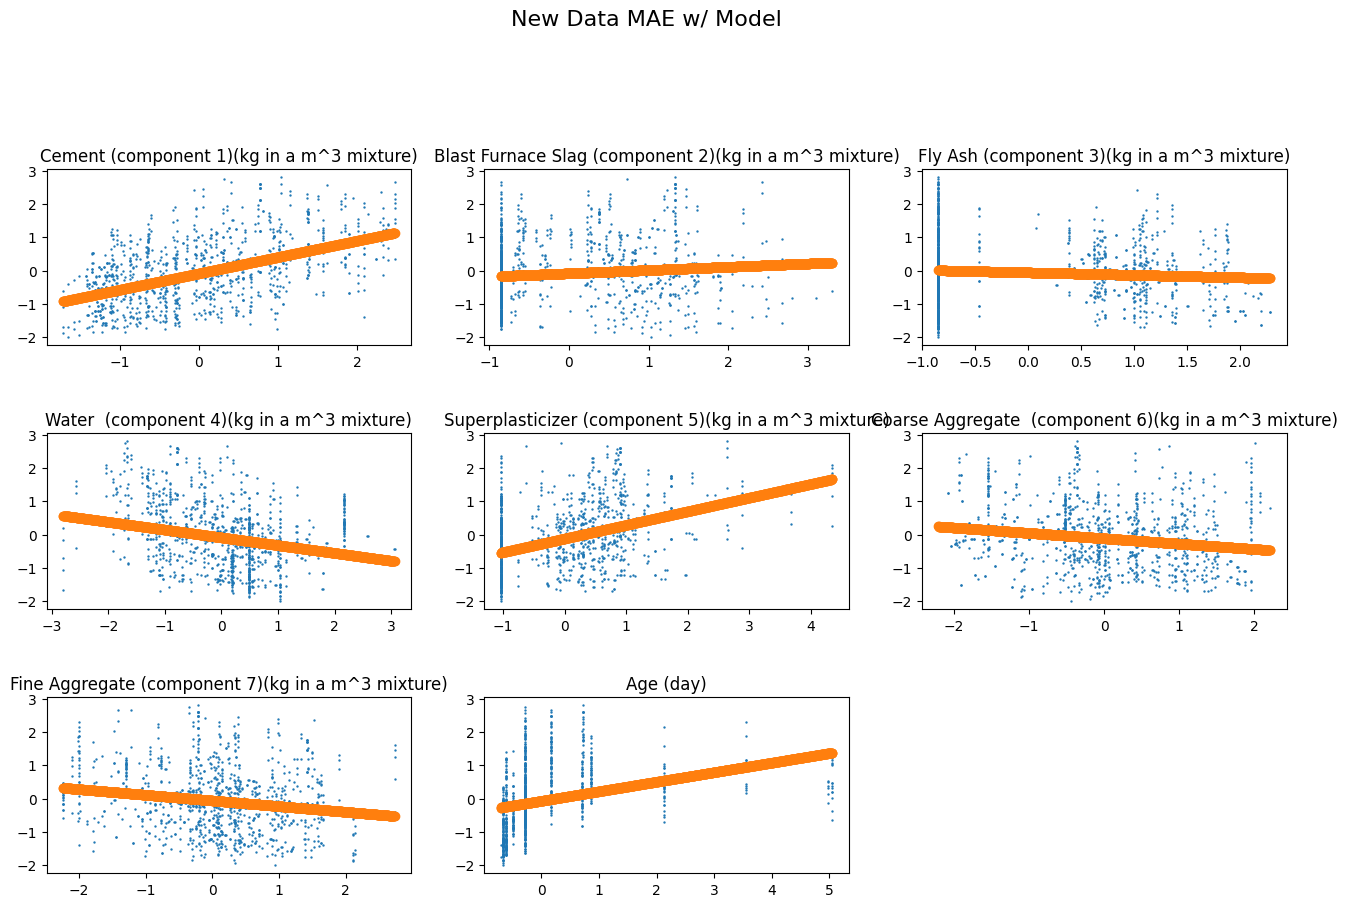

In [64]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('New Data MAE w/ Model', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(x_new[:,index], y_new, s=0.5)
    x = np.linspace(np.min(x_new[:,index]), np.max(x_new[:,index]),1000)
    ax.scatter(x, m_list_Uni_new_MAE[index]*x + b_list_Uni_new_MAE[index])
    ax.set_title(feature_name)
    
plt.show()

### d) Ridge Regression Univariate Data New - FIX

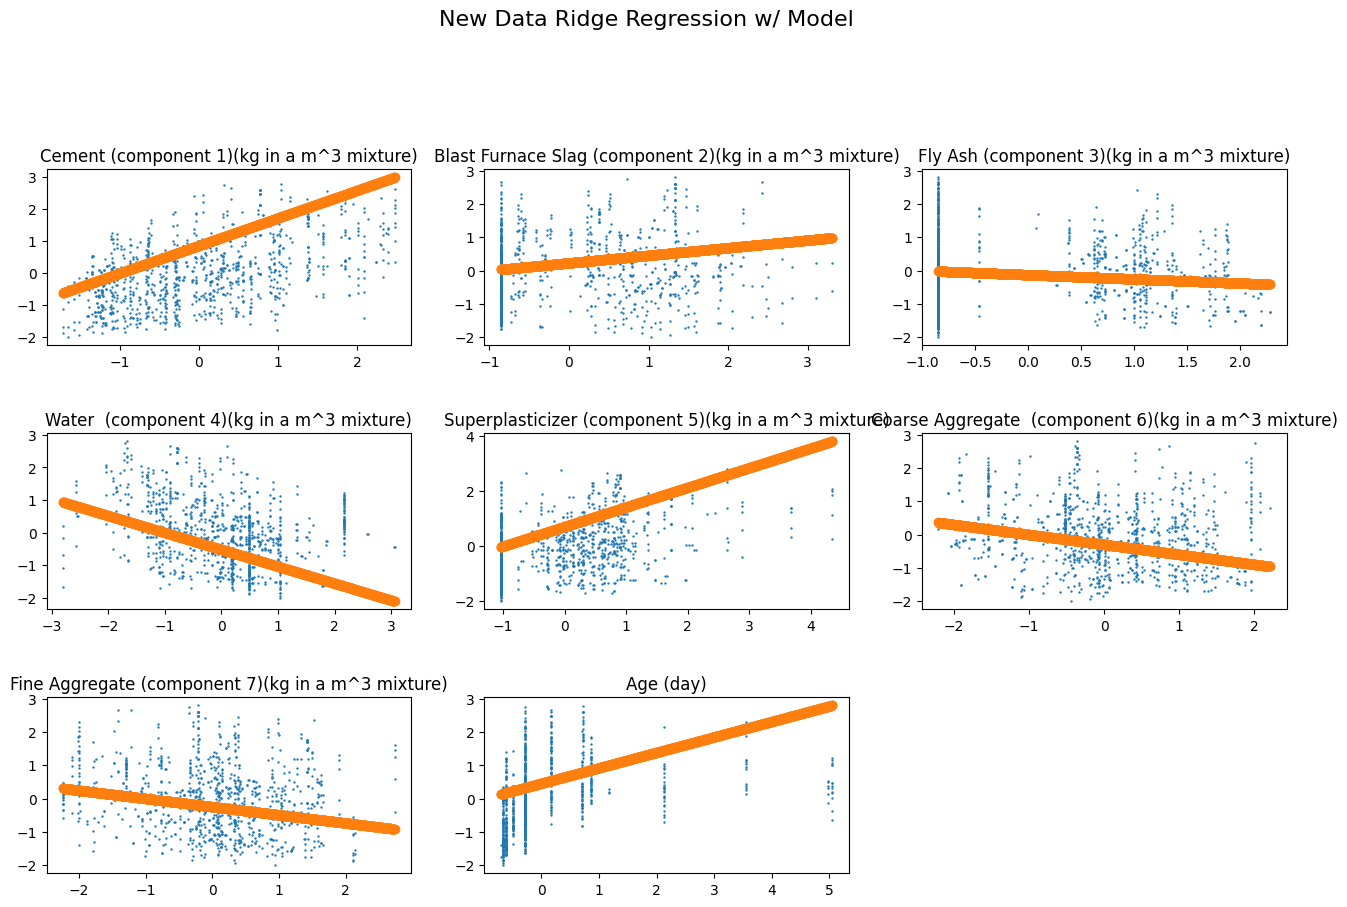

In [65]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('New Data Ridge Regression w/ Model', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(x_new[:,index], y_new, s=0.5)
    x = np.linspace(np.min(x_new[:,index]), np.max(x_new[:,index]),1000)
    ax.scatter(x, m_list_Uni_new_Ridge[index]*x + m_list_Uni_new_Ridge[index])
    ax.set_title(feature_name)
    
plt.show()